### Notebook by Suryanarayan.B
### CB.EN.U4CSE19056

## **19CSE456: Neural Network and Deep Learning : LAB3**

1.   Select any classification dataset from UCI Machine Learning Library: https://archive.ics.uci.edu/ml/datasets.php
2.   Design a four layer neural network (4 hidden layers) and provide your testing accuracy on the selected dataset (**for 100 epoch**s) with sigmoid as the hidden layer activation functions and SGD as the optimizer.
3. Design MLP of the same archetecure of question.2 and use different weight initialization strategies. Refer: https://keras.io/api/layers/initializers/ to know more about weight initialization. 
Try Different initialization schemes and find out which initialization works better on the selected dataset (**for 100 epoch**s) with sigmoid as the hidden layer activation functions and SGD as the optimizer.
       * RandomNormal 
       * RandomUniform
       * TruncatedNormal
       * Zero
       * One
       * GlorotNormal
       * GlorotUniform 
       * HeNormal
       * HeUniform 
       * Identity
       * Orthogonal
4. Implement the MLP model with the best weight initialization from the previous experiment and use Relu as the activation funation and provide your testing accuracy on the selected dataset (**for 100 epochs**).
5. Use ADAM optimizer instead of SGD in question 4 and comapre the models in terms of test accuracy and train/validation (accuracy/loss) graphs.
6. Display confusion matrix for all of the bove experiments and write down your inferences.

**NOTE: This Experiment will be evaluated based on the submission (Code, Inferences and Analysis). Submit the Jupyter notebook and pdf version of the notebook**

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('car.data')

In [3]:
df.head(100)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
95,vhigh,vhigh,5more,4,big,low,unacc
96,vhigh,vhigh,5more,4,big,med,unacc
97,vhigh,vhigh,5more,4,big,high,unacc
98,vhigh,vhigh,5more,more,small,low,unacc


In [4]:
X=df.drop('unacc',axis=1)

In [5]:
X

,vhigh,vhigh.1,2,2.1,small,low
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [6]:
Y=df.iloc[:,-1]

In [7]:
Y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: unacc, Length: 1727, dtype: object

In [8]:
X=pd.get_dummies(X)

In [9]:
X

,vhigh_high,vhigh_low,vhigh_med,vhigh_vhigh,vhigh.1_high,vhigh.1_low,vhigh.1_med,vhigh.1_vhigh,2_2,2_3,...,2_5more,2.1_2,2.1_4,2.1_more,small_big,small_med,small_small,low_high,low_low,low_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1723,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


In [10]:
Y=pd.get_dummies(Y)

In [11]:
Y

,acc,good,unacc,vgood
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
1722,0,1,0,0
1723,0,0,0,1
1724,0,0,1,0
1725,0,1,0,0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [14]:
print("Train shape",X_train.shape)
print("Test shape",X_test.shape)
print(y_train.shape)
print(y_test.shape)

Train shape (1157, 21)
Test shape (570, 21)
(1157, 4)
(570, 4)


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)

In [17]:
print("Train shape",X_train.shape)
print("Test shape",X_test.shape)
print(y_train.shape)
print(y_test.shape)

Train shape (1157, 21)
Test shape (570, 21)
(1157, 4)
(570, 4)


In [18]:
X_train=np.asarray(X_train).astype(float)

y_train=np.asarray(y_train).astype(float)

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import GlobalAveragePooling1D

In [20]:
model=Sequential()

In [21]:
model.add(Dense(50, input_shape = (21,), activation = 'sigmoid'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(4,activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1100      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 204       
Total params: 11,504
Trainable params: 11,504
Non-trainable params: 0
____________________________________________________

In [23]:
from tensorflow.keras import optimizers

In [24]:
sgd = optimizers.SGD(learning_rate = 0.001)

In [25]:
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [26]:
model_history1 = model.fit(X_train,y_train,validation_split=0.3,epochs=100,verbose=1)

Epoch 1/100
26/26 [==============================] - 3s 19ms/step - loss: 1.2255 - accuracy: 0.7145 - val_loss: 1.2027 - val_accuracy: 0.6667
Epoch 2/100
26/26 [==============================] - 0s 7ms/step - loss: 1.1490 - accuracy: 0.7145 - val_loss: 1.1428 - val_accuracy: 0.6667
Epoch 3/100
26/26 [==============================] - 0s 6ms/step - loss: 1.0873 - accuracy: 0.7145 - val_loss: 1.0963 - val_accuracy: 0.6667
Epoch 4/100
26/26 [==============================] - 0s 6ms/step - loss: 1.0385 - accuracy: 0.7145 - val_loss: 1.0604 - val_accuracy: 0.6667
Epoch 5/100
26/26 [==============================] - 0s 8ms/step - loss: 1.0000 - accuracy: 0.7145 - val_loss: 1.0323 - val_accuracy: 0.6667
Epoch 6/100
26/26 [==============================] - 0s 6ms/step - loss: 0.9693 - accuracy: 0.7145 - val_loss: 1.0107 - val_accuracy: 0.6667
Epoch 7/100
26/26 [==============================] - 0s 6ms/step - loss: 0.9451 - accuracy: 0.7145 - val_loss: 0.9941 - val_accuracy: 0.6667
Epoch 8/100


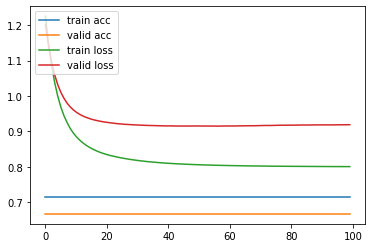

In [27]:
plt.plot(model_history1.history['accuracy' ])
plt.plot(model_history1.history['val_accuracy'])
plt.plot(model_history1.history['loss'])
plt.plot(model_history1.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

In [28]:
model_out1=model.evaluate(X_test,y_test)
print(f"Test Accuracy is: {model_out1[1]*100}%")

18/18 [==============================] - 0s 4ms/step - loss: 0.8388 - accuracy: 0.7000
Test Accuracy is: 69.9999988079071%


In [29]:
print(model.metrics_names)     # list of metric names the model is employing
print(model_out1)

['loss', 'accuracy']
[0.8388161659240723, 0.699999988079071]


In [30]:
def init_model(initializer):
  model = Sequential()

  model.add(Dense(50, input_shape=(21, ), kernel_initializer=initializer,activation='sigmoid'))
  model.add(Dense (50,kernel_initializer=initializer , activation='sigmoid'))
  model.add(Dense (50,kernel_initializer=initializer , activation='sigmoid'))
  model.add(Dense (50,kernel_initializer=initializer , activation='sigmoid'))
  model.add(Dense (50,kernel_initializer=initializer , activation='sigmoid'))
  model.add(Dense (4,kernel_initializer=initializer , activation='softmax'))

  sgd = optimizers.SGD(learning_rate = 0.001)
  model.compile(optimizer = sgd, loss = "categorical_crossentropy", metrics = ['accuracy'])
  return model

In [31]:
init=['random_normal','random_uniform','truncated_normal','zeros','ones','glorot_normal','glorot_uniform','he_normal','he_uniform','identity','orthogonal']
temp={'weight_initializers':init,'test_accuracy':[]}
history=[None]*11
models = [None]*11
out=[None]*11

for i in range(11):
  models[i] = init_model(init[i])
  history[i] = models[i].fit(X_train,y_train,validation_split=0.3,epochs=100,verbose=1)
  out[i]=models[i].evaluate(X_test,y_test)
  print(f"Test Accuracy for weight initializer {init[i]} is: {out[i][1]*100}%" )
  temp['test_accuracy'].append(out[i][1]*100)
acc_wrt_init=pd.DataFrame.from_dict(temp)

Epoch 1/100
26/26 [==============================] - 1s 14ms/step - loss: 1.2588 - accuracy: 0.7145 - val_loss: 1.2359 - val_accuracy: 0.6667
Epoch 2/100
26/26 [==============================] - 0s 14ms/step - loss: 1.1810 - accuracy: 0.7145 - val_loss: 1.1738 - val_accuracy: 0.6667
Epoch 3/100
26/26 [==============================] - 0s 6ms/step - loss: 1.1171 - accuracy: 0.7145 - val_loss: 1.1243 - val_accuracy: 0.6667
Epoch 4/100
26/26 [==============================] - 0s 6ms/step - loss: 1.0656 - accuracy: 0.7145 - val_loss: 1.0854 - val_accuracy: 0.6667
Epoch 5/100
26/26 [==============================] - 0s 6ms/step - loss: 1.0243 - accuracy: 0.7145 - val_loss: 1.0553 - val_accuracy: 0.6667
Epoch 6/100
26/26 [==============================] - 0s 6ms/step - loss: 0.9918 - accuracy: 0.7145 - val_loss: 1.0314 - val_accuracy: 0.6667
Epoch 7/100
26/26 [==============================] - 0s 6ms/step - loss: 0.9655 - accuracy: 0.7145 - val_loss: 1.0121 - val_accuracy: 0.6667
Epoch 8/100

In [32]:
def show_plot(i):
  plt.title(init[i])
  plt.plot(history[i].history['accuracy'])
  plt.plot(history[i].history['val_accuracy'])
  plt.plot(history[i].history['loss'])
  plt.plot(history[i].history['val_loss'])
  plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
  plt.show()

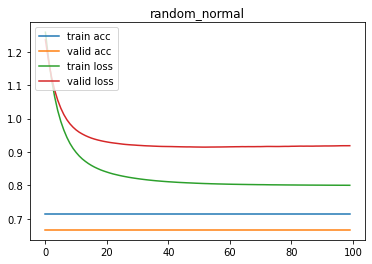

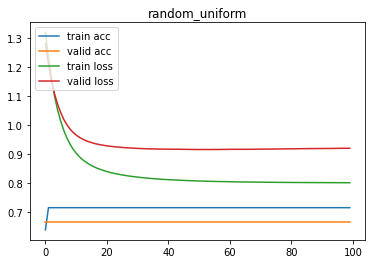

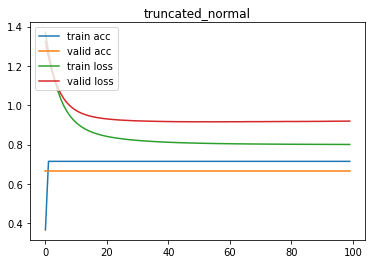

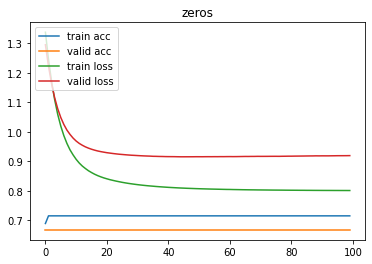

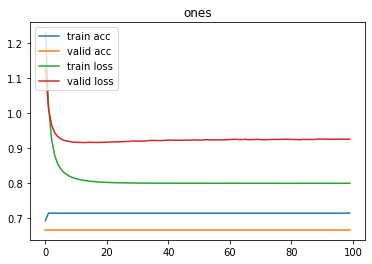

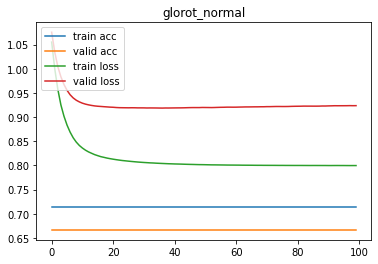

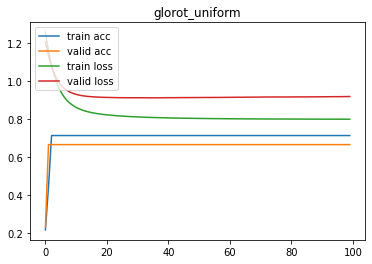

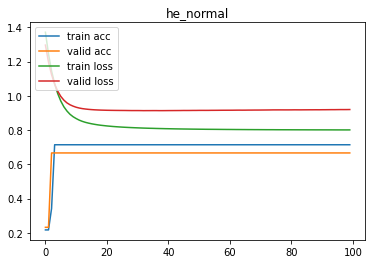

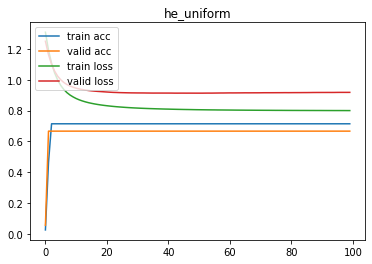

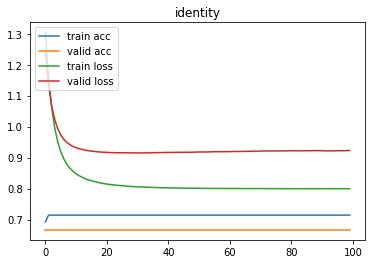

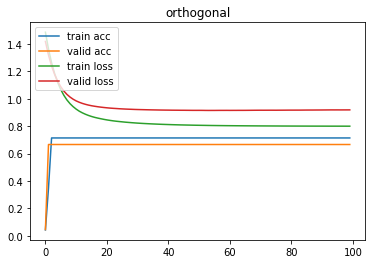

In [33]:
for i in range(11):
  show_plot(i)

In [34]:
acc_wrt_init

,weight_initializers,test_accuracy
0,random_normal,69.999999
1,random_uniform,69.999999
2,truncated_normal,69.999999
3,zeros,69.999999
4,ones,69.999999
5,glorot_normal,69.999999
6,glorot_uniform,69.999999
7,he_normal,69.999999
8,he_uniform,69.999999
9,identity,69.999999


In [35]:
def q4_init_model(initializer='random_uniform'):
  model = Sequential()

  model.add(Dense(50, input_shape=(21, ), kernel_initializer=initializer,activation='relu'))
  model.add(Dense (50,kernel_initializer=initializer , activation='relu'))
  model.add(Dense (50,kernel_initializer=initializer , activation='relu'))
  model.add(Dense (50,kernel_initializer=initializer , activation='relu'))
  model.add(Dense (50,kernel_initializer=initializer , activation='relu'))
  model.add(Dense (4,kernel_initializer=initializer , activation='softmax'))

  sgd = optimizers.SGD(learning_rate = 0.001)
  model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [36]:
q4_model=q4_init_model()
q4_history=q4_model.fit(X_train,y_train,validation_split=0.3,epochs=100,verbose=1)

Epoch 1/100
26/26 [==============================] - 1s 12ms/step - loss: 1.3825 - accuracy: 0.7108 - val_loss: 1.3789 - val_accuracy: 0.6667
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 1.3743 - accuracy: 0.7145 - val_loss: 1.3715 - val_accuracy: 0.6667
Epoch 3/100
26/26 [==============================] - 0s 6ms/step - loss: 1.3661 - accuracy: 0.7145 - val_loss: 1.3643 - val_accuracy: 0.6667
Epoch 4/100
26/26 [==============================] - 0s 6ms/step - loss: 1.3583 - accuracy: 0.7145 - val_loss: 1.3572 - val_accuracy: 0.6667
Epoch 5/100
26/26 [==============================] - 0s 6ms/step - loss: 1.3504 - accuracy: 0.7145 - val_loss: 1.3503 - val_accuracy: 0.6667
Epoch 6/100
26/26 [==============================] - 0s 6ms/step - loss: 1.3428 - accuracy: 0.7145 - val_loss: 1.3434 - val_accuracy: 0.6667
Epoch 7/100
26/26 [==============================] - 0s 6ms/step - loss: 1.3351 - accuracy: 0.7145 - val_loss: 1.3366 - val_accuracy: 0.6667
Epoch 8/100


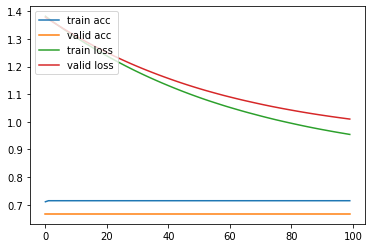

In [37]:
plt.plot(q4_history.history['accuracy' ])
plt.plot(q4_history.history['val_accuracy'])
plt.plot(q4_history.history['loss'])
plt.plot(q4_history.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

In [38]:
q4_out=q4_model.evaluate(X_test,y_test)
print(f"Test Accuracy  is: {q4_out[1]*100}%" )

18/18 [==============================] - 0s 4ms/step - loss: 0.9709 - accuracy: 0.7000
Test Accuracy  is: 69.9999988079071%


In [39]:
def q5_init_model(initializer='random_uniform'):
  model = Sequential()

  model.add(Dense(50, input_shape=(21, ), kernel_initializer=initializer,activation='relu'))
  model.add(Dense (50,kernel_initializer=initializer , activation='relu'))
  model.add(Dense (50,kernel_initializer=initializer , activation='relu'))
  model.add(Dense (50,kernel_initializer=initializer , activation='relu'))
  model.add(Dense (50,kernel_initializer=initializer , activation='relu'))
  model.add(Dense (4,kernel_initializer=initializer , activation='softmax'))

  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [40]:
q5_model=q5_init_model()
q5_history=q5_model.fit(X_train,y_train,validation_split=0.3,epochs=100,verbose=1)

Epoch 1/100
26/26 [==============================] - 1s 17ms/step - loss: 1.3549 - accuracy: 0.7095 - val_loss: 1.2602 - val_accuracy: 0.6667
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 0.8686 - accuracy: 0.7145 - val_loss: 0.7048 - val_accuracy: 0.6667
Epoch 3/100
26/26 [==============================] - 0s 6ms/step - loss: 0.5372 - accuracy: 0.7145 - val_loss: 0.5830 - val_accuracy: 0.6667
Epoch 4/100
26/26 [==============================] - 0s 8ms/step - loss: 0.4427 - accuracy: 0.7145 - val_loss: 0.5032 - val_accuracy: 0.6667
Epoch 5/100
26/26 [==============================] - 0s 6ms/step - loss: 0.3892 - accuracy: 0.7157 - val_loss: 0.4666 - val_accuracy: 0.6724
Epoch 6/100
26/26 [==============================] - 0s 6ms/step - loss: 0.3553 - accuracy: 0.7194 - val_loss: 0.4341 - val_accuracy: 0.6954
Epoch 7/100
26/26 [==============================] - 0s 5ms/step - loss: 0.3315 - accuracy: 0.7281 - val_loss: 0.4124 - val_accuracy: 0.7155
Epoch 8/100


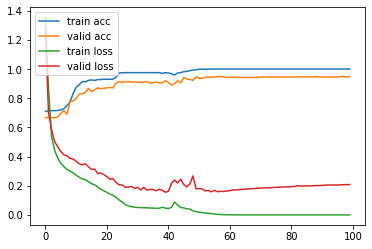

In [41]:
plt.plot(q5_history.history['accuracy' ])
plt.plot(q5_history.history['val_accuracy'])
plt.plot(q5_history.history['loss'])
plt.plot(q5_history.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

In [42]:
q5_out=q5_model.evaluate(X_test,y_test)
print(f"Test Accuracy  is: {q5_out[1]*100}%" )

18/18 [==============================] - 0s 3ms/step - loss: 0.1798 - accuracy: 0.9649
Test Accuracy  is: 96.49122953414917%


In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
y_test.shape

(570, 4)

In [45]:
X_test.shape

(570, 21)

In [46]:
model.predict(X_test).shape



(570, 4)

In [47]:
def print_conf(model):
    labels=y_test.to_numpy()
    y_pred=model.predict(X_test)
    diffmatrix = confusion_matrix(labels.argmax(axis=1), y_pred.argmax(axis=1))
    print(diffmatrix)

In [48]:
print_conf(model)

[[  0   0 127   0]
 [  0   0  18   0]
 [  0   0 399   0]
 [  0   0  26   0]]


In [49]:
print_conf(q4_model)

[[  0   0 127   0]
 [  0   0  18   0]
 [  0   0 399   0]
 [  0   0  26   0]]


In [50]:
print_conf(q5_model)

[[117   8   2   0]
 [  1  14   0   3]
 [  1   0 398   0]
 [  0   5   0  21]]
